In [10]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [11]:
# ********************
# ****** IMPORT ******
# ********************
df_k729_2022_cuid = pd.read_csv('./datasets/k729_2022_cuid.csv')
df_k729_2022_cuid_grouped = pd.read_csv('./datasets/k729_2022_cuid_grouped.csv')
df_k729_2022_cuid_grouped['x'] = df_k729_2022_cuid_grouped['x'].apply(lambda x: ast.literal_eval(x))
df_k729_2022_cuid_grouped['y'] = df_k729_2022_cuid_grouped['y'].apply(lambda y: ast.literal_eval(y))
df_k729_2022_cuid_grouped['vx'] = df_k729_2022_cuid_grouped['vx'].apply(lambda vx: ast.literal_eval(vx))
df_k729_2022_cuid_grouped['vy'] = df_k729_2022_cuid_grouped['vy'].apply(lambda vy: ast.literal_eval(vy))
df_k729_2022_cuid_grouped['v'] = df_k729_2022_cuid_grouped['v'].apply(lambda v: ast.literal_eval(v))

df_k733_2020_cuid = pd.read_csv('./datasets/k733_2020_cuid.csv')
df_k733_2020_cuid_grouped = pd.read_csv('./datasets/k733_2020_cuid_grouped.csv')
df_k733_2020_cuid_grouped['x'] = df_k733_2020_cuid_grouped['x'].apply(lambda x: ast.literal_eval(x))
df_k733_2020_cuid_grouped['y'] = df_k733_2020_cuid_grouped['y'].apply(lambda y: ast.literal_eval(y))

df_k733_2018_cuid = pd.read_csv('./datasets/k733_2018_cuid.csv')
df_k733_2018_cuid_grouped = pd.read_csv('./datasets/k733_2018_cuid_grouped.csv')
df_k733_2018_cuid_grouped['x'] = df_k733_2018_cuid_grouped['x'].apply(lambda x: ast.literal_eval(x))
df_k733_2018_cuid_grouped['y'] = df_k733_2018_cuid_grouped['y'].apply(lambda y: ast.literal_eval(y))
df_k733_2018_cuid_grouped['vx'] = df_k733_2018_cuid_grouped['vx'].apply(lambda vx: ast.literal_eval(vx))
df_k733_2018_cuid_grouped['vy'] = df_k733_2018_cuid_grouped['vy'].apply(lambda vy: ast.literal_eval(vy))

In [12]:
k729_differences = [0] * len(df_k729_2022_cuid_grouped['vx'])
for i in range(len(df_k729_2022_cuid_grouped['vx'])):
    differences = []
    vx_as_np_array = np.array(df_k729_2022_cuid_grouped['vx'][i])
    for j in range(len(vx_as_np_array)-1):
        difference = vx_as_np_array[j+1] - vx_as_np_array[j] 
        differences.append(difference)
    differences_as_np_array = np.array(differences)
    k729_differences[i] = differences_as_np_array


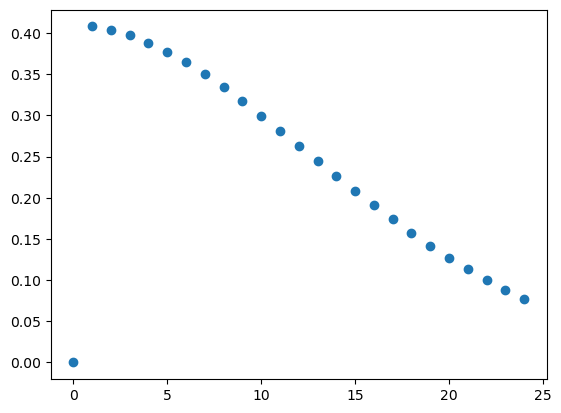

In [16]:
plt.scatter(range(len(k729_differences[0])), k729_differences[0])
plt.show()

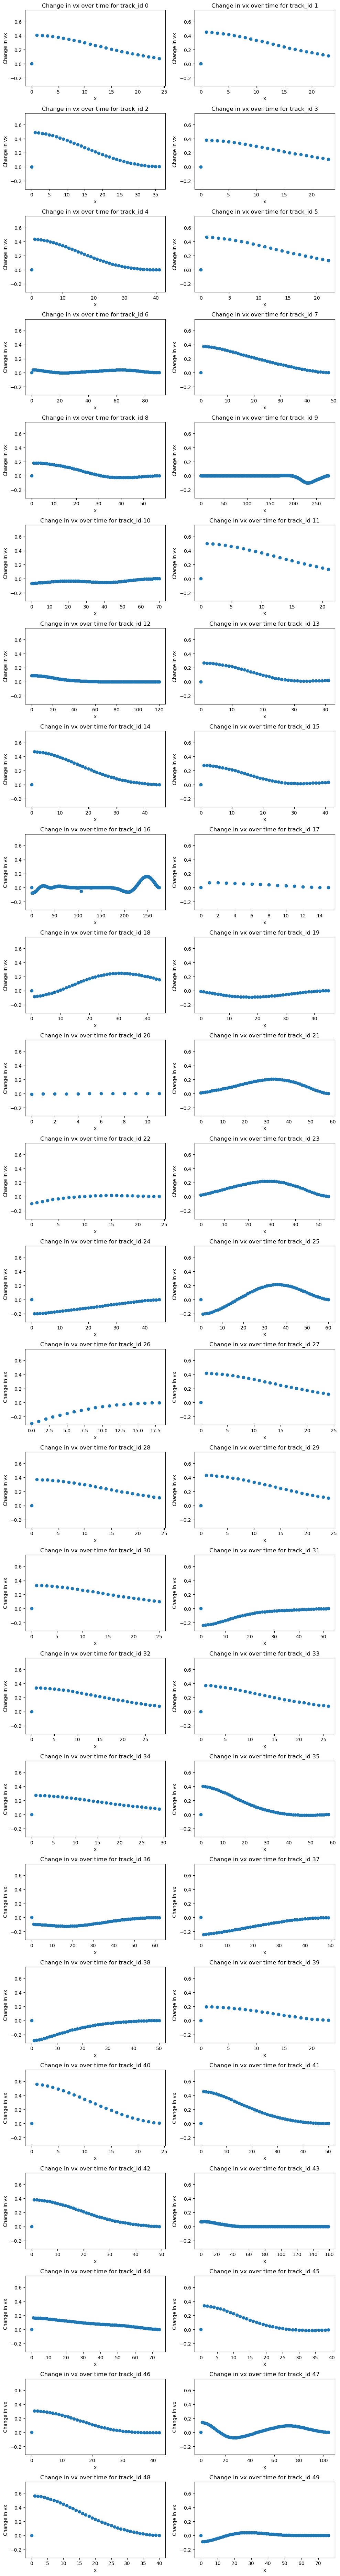

-0.31756259433446854
0.7637217355308313


In [21]:
min_change = min([min(vx_change) for vx_change in k729_differences])
max_change = max([max(vx_change) for vx_change in k729_differences])

multiplier = 5
fig, axs = plt.subplots(5*multiplier,2, figsize=(10,15*multiplier))
for i, ax in enumerate(axs.flat):
    ax.set_ylim(min_change,max_change)
    x = range(len(k729_differences[i]))
    y = k729_differences[i]
    ax.scatter(x,y)
    ax.set_xlabel('x')
    ax.set_ylabel('Change in vx')
    ax.set_title(f'Change in vx over time for track_id {i}')

plt.tight_layout()
plt.show()

print(min_change)
print(max_change)

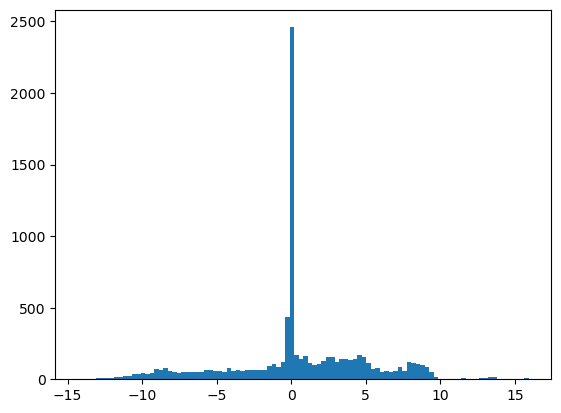

In [46]:
# all_vs_no_first_val = [list(filter(lambda x: x<1, v)) for v in df_k729_2022_cuid_grouped['v']]
# all_vs_no_first_val = sum(all_vs_no_first_val, [])
# plt.hist(all_vs_no_first_val,bins=100)
plt.hist(df_k729_2022_cuid['vy'], bins=100)
plt.show()